<a href="https://colab.research.google.com/github/Arnav-Barman/UML501-ML/blob/main/Assignment7_ArnavBarman_3CO15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

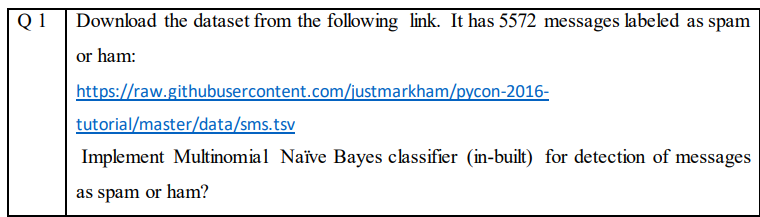

In [35]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
df=pd.read_csv('/content/sms.csv',delimiter=',',names=['Label','Message'])
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [38]:
df["Label"]=df["Label"].map({'spam':1,'ham':0})
df.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
corpus=df['Message'].values.tolist()
print(corpus)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though", "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv", 'Even my brother is not like to speak with me. They treat me like aids patent.', "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune", 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.', 'Had your mobile 

In [40]:
nopunc=[]
for i in range(len(corpus)):
  no  = [char for char in corpus[i] if char not in string.punctuation]
  nopunc.append(''.join(no))
df['text_nopunc']=pd.Series(nopunc)
df.head()

,Label,Message,text_nopunc
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In [41]:
stop=stopwords.words(fileids='english')
text_nostop=[]
for i in range(len(nopunc)):
    text_nostop.append(" ".join([word for word in str(nopunc[i]).split() if word not in stop]))
df['text_nostop']=pd.Series(text_nostop)
df.head()

,Label,Message,text_nopunc,text_nostop
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,Go jurong point crazy Available bugis n great ...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,U dun say early hor U c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,Nah I dont think goes usf lives around though


In [42]:
wordnet=PorterStemmer()
text_lemm=[]
for i in range(len(text_nostop)):
    text_lemm.append(" ".join([wordnet.stem(word) for word in text_nostop[i].split()]))
df['text_lemm']=pd.Series(text_lemm)
df.head()

,Label,Message,text_nopunc,text_nostop,text_lemm
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,Go jurong point crazy Available bugis n great ...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,Ok lar Joking wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,U dun say early hor U c already say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,Nah I dont think goes usf lives around though,nah i dont think goe usf live around though


In [43]:
vect = TfidfVectorizer()
tfidf_matrix = vect.fit_transform(df['text_lemm'])
print(vect.get_feature_names())
print(tfidf_matrix.shape)
df1= pd.DataFrame(tfidf_matrix.toarray(),columns=vect.get_feature_names())
print(df1)

['008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '08701213186', '0870

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
x_train,x_test,y_train,y_test = train_test_split(df1,df['Label'],test_size = 0.3,random_state = 0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3900, 8165), (1672, 8165), (3900,), (1672,))

In [45]:
spam_detect_model = MultinomialNB().fit(x_train,y_train)
y_pred=spam_detect_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1451
           1       1.00      0.73      0.84       221

    accuracy                           0.96      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.97      0.96      0.96      1672

[[1451    0]
 [  60  161]]


In [47]:
print(confusion_matrix(y_test,y_pred),accuracy_score(y_test,y_pred))

[[1451    0]
 [  60  161]] 0.9641148325358851


---

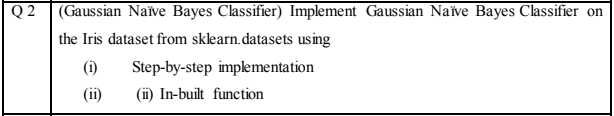

i) Step-by-Step implementation

In [48]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [49]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [51]:
X=df.drop('target',axis=1)
y=df['target']

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape,X_test.shape

((112, 4), (38, 4))

In [53]:
train_size=X_train.shape[0]
class_priors={}
for outcome in np.unique(y_train):
  outcome_count = sum(y_train == outcome)
  class_priors[outcome] = outcome_count / train_size
print(class_priors)

{0: 0.3125, 1: 0.3482142857142857, 2: 0.3392857142857143}


In [54]:
features=list(X_train.columns)
likelihoods={}
for outcome in np.unique(y_train):
  outcome_count = sum(y_train == outcome)
  for feature in features:
    l=X_train[feature].values
    p=y_train.values
    for feat_value in np.unique(X_train[feature]):
      count=0
      for i in range(len(X_train)):
        if(l[i]==feat_value and p[i]==outcome):
          count=count+1
      likelihoods[(feature,feat_value,outcome)]=(count+1)/(outcome_count+(len(features)))
likelihoods

{('sepal length (cm)', 4.3, 0): 0.05128205128205128,
 ('sepal length (cm)', 4.4, 0): 0.07692307692307693,
 ('sepal length (cm)', 4.5, 0): 0.05128205128205128,
 ('sepal length (cm)', 4.6, 0): 0.10256410256410256,
 ('sepal length (cm)', 4.7, 0): 0.05128205128205128,
 ('sepal length (cm)', 4.8, 0): 0.05128205128205128,
 ('sepal length (cm)', 4.9, 0): 0.10256410256410256,
 ('sepal length (cm)', 5.0, 0): 0.20512820512820512,
 ('sepal length (cm)', 5.1, 0): 0.20512820512820512,
 ('sepal length (cm)', 5.2, 0): 0.07692307692307693,
 ('sepal length (cm)', 5.3, 0): 0.05128205128205128,
 ('sepal length (cm)', 5.4, 0): 0.1282051282051282,
 ('sepal length (cm)', 5.5, 0): 0.05128205128205128,
 ('sepal length (cm)', 5.6, 0): 0.02564102564102564,
 ('sepal length (cm)', 5.7, 0): 0.02564102564102564,
 ('sepal length (cm)', 5.8, 0): 0.05128205128205128,
 ('sepal length (cm)', 5.9, 0): 0.02564102564102564,
 ('sepal length (cm)', 6.0, 0): 0.02564102564102564,
 ('sepal length (cm)', 6.1, 0): 0.0256410256410

In [55]:
a=len(np.unique(y_train))
prob=np.ones((a,len(X_test)),dtype=np.float)
for outcome in(np.unique(y_train)):
  outcome_count = sum(y_train == outcome)
  for feature in features:
    l=X_test[feature].values
    for i in range(len(X_test)):
      if (feature,l[i],outcome) in likelihoods.keys():
        prob[outcome][i]*=likelihoods[(feature,l[i],outcome)]
      else:
        prob[outcome][i]*=(1/(outcome_count+len(features)))
prob

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([[4.32256539e-07, 2.59353923e-05, 4.32256539e-07, 8.64513078e-07,
        4.32256539e-07, 6.80804049e-04, 8.64513078e-07, 1.29676962e-06,
        4.32256539e-07, 8.64513078e-07, 1.72902616e-06, 2.07483139e-04,
        5.96514024e-04, 1.86734825e-04, 4.66837062e-04, 1.29676962e-06,
        2.16128270e-06, 4.32256539e-07, 4.32256539e-07, 4.32256539e-07,
        3.18140813e-04, 2.16128270e-06, 4.84127324e-04, 4.32256539e-07,
        1.29676962e-06, 2.16128270e-06, 4.32256539e-07, 1.72902616e-06,
        2.59353923e-04, 2.38605610e-04, 1.19302805e-04, 1.94515443e-05,
        1.29676962e-06, 5.56746422e-04, 7.15816829e-04, 4.32256539e-07,
        1.72902616e-06, 1.34215655e-03],
       [7.48800530e-05, 1.46250103e-06, 1.17000083e-06, 2.24640159e-04,
        1.40400099e-05, 1.17000083e-06, 8.42400596e-05, 3.51000248e-06,
        3.74400265e-05, 3.51000248e-05, 3.51000248e-06, 2.63250186e-06,
        1.75500124e-06, 1.75500124e-06, 5.85000414e-07, 1.05300074e-05,
        5.26500372e-06,

In [56]:
for i in range(prob.shape[0]):
  prob[i][:]=prob[i][:]*class_priors[i]

In [57]:
y_pred=[]
for i in range(len(prob[0])):
  if prob[0][i]>prob[1][i] and prob[0][i]>prob[2][i]:
    y_pred.append(0)
  elif prob[1][i]>prob[0][i] and prob[1][i]>prob[2][i]:
    y_pred.append(1)
  elif prob[2][i]>prob[1][i] and prob[2][i]>prob[0][i]:
    y_pred.append(2)
y_pred

[1,
 0,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0]

In [58]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.82      0.90        11
           2       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

[[15  0  0]
 [ 0  9  2]
 [ 0  0 12]]


---

ii) Using inbuilt function

In [59]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
1.0


---

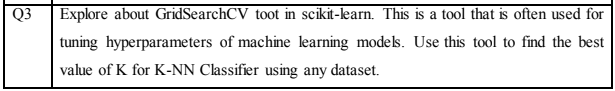

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

In [61]:
iris = load_iris()
X = iris.data
y = iris.target

In [62]:
k_range = list(range(1,20))
param = {"weights": ["uniform", "distance"]}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn,param, cv = 10, scoring = 'accuracy')
grid.fit(X,y)
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9666666666666668
{'weights': 'uniform'}
KNeighborsClassifier()


---